# Learning Exercise I-B
Find the number of iterations with the largest amplitude when you run the Grover's algorithm with one solution in a database with $N = 2 ^ 7$. As shown above, change the number of iterations and check the amplification. The answer must be an integer.

Hint: Fewer than 15 times. 

## Answer 
As explained in hint by Ryoko, the optimal number of times can be calculated using the following formula.
$$t = \frac{\pi}{4}\sqrt{N}-\frac{1}{2}$$

Let's find the optimum number of iterations (approximate) when N is up to $2^{16}$.

In [1]:
# Number of iteration 
import math
import numpy as np
def num_iter(n):
    res = ((np.pi/4) * (math.sqrt(n))) - (1/2)
    iter_list = ['N:'+str(n), 'Number of iteration:'+ str(res)]
    return iter_list

for i in range(16):
    n = 2**i
    print(num_iter(n))

['N:1', 'Number of iteration:0.2853981633974483']
['N:2', 'Number of iteration:0.6107207345395915']
['N:4', 'Number of iteration:1.0707963267948966']
['N:8', 'Number of iteration:1.721441469079183']
['N:16', 'Number of iteration:2.641592653589793']
['N:32', 'Number of iteration:3.942882938158366']
['N:64', 'Number of iteration:5.783185307179586']
['N:128', 'Number of iteration:8.385765876316732']
['N:256', 'Number of iteration:12.066370614359172']
['N:512', 'Number of iteration:17.271531752633464']
['N:1024', 'Number of iteration:24.632741228718345']
['N:2048', 'Number of iteration:35.04306350526693']
['N:4096', 'Number of iteration:49.76548245743669']
['N:8192', 'Number of iteration:70.58612701053386']
['N:16384', 'Number of iteration:100.03096491487338']
['N:32768', 'Number of iteration:141.67225402106772']


We got 8.39. It's about 8.

Let's generate a quantum circuit and check the actual amplification. Generate a circuit to search for 47 (use any number up to $2^7$-1) from $2^7$.

In [2]:
# importing Qiskit
from qiskit import Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.providers.aer import QasmSimulator

backend = Aer.get_backend('qasm_simulator')
prob_of_ans = []

for x in range(15):
    database = QuantumRegister(7)
    oracle = QuantumRegister(1)
    ancilla = QuantumRegister(5) 
    cr = ClassicalRegister(7)
    qc = QuantumCircuit(database, oracle, ancilla, cr)
    qc.h(database[:])
    qc.x(oracle[0])
    qc.h(oracle[0])


    for j in range(x):
    # oracle_7q
        # search 47: 0101111
        qc.x(database[0])
        qc.x(database[2])
        qc.mct(database[:], oracle[0], ancilla[:], mode='basic') 
        qc.x(database[0])
        qc.x(database[2])

    # diffusion_７q
        qc.h(database[:])
        qc.x(database[:])
        qc.h(database[6])
        qc.mct(database[0:6], database[6], ancilla[:], mode='basic')
        qc.h(database[6])
        qc.x(database[:])
        qc.h(database[:])


    qc.h(oracle[0])
    qc.x(oracle[0])
    qc.measure(database,cr)
    # Change the endian 
    qc = qc.reverse_bits() 

    job = execute(qc, backend=backend, shots=1000, backend_options={"fusion_enable":True})
    result = job.result()
    count = result.get_counts()
    answer = count['0101111']
    prob_of_ans.append(answer)

Text(0, 0.5, '# of times the solution was obtained')

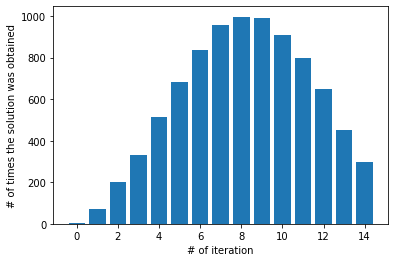

In [3]:
import matplotlib.pyplot as plt
iteration = [i for i in range(15)]
plt.bar(iteration, prob_of_ans)
plt.xlabel('# of iteration')
plt.ylabel('# of times the solution was obtained')

The answer is 8. 